In [130]:
#Credit Card Fraud Prediction

In [3]:
import pandas as pd
import numpy as np

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
fraud_df = pd.read_csv('creditcard.csv')

In [6]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#Exploratory Analysis
#The data has been transformed with PCA to ensure privacy - hence the V1, V2, V3... columns

In [8]:
# Check for missing values
print(fraud_df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Class
0    284315
1       492
Name: count, dtype: int64


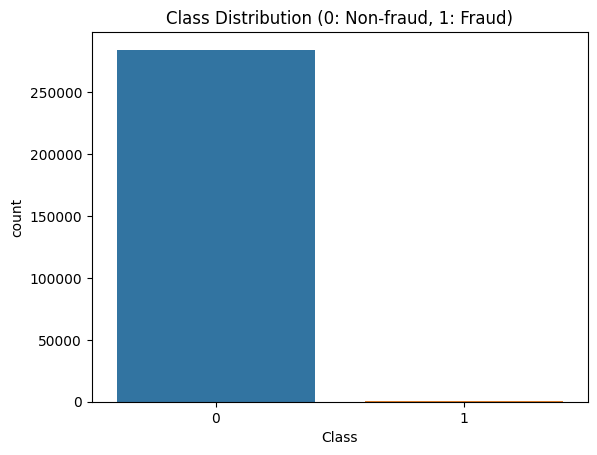

In [9]:
# Check and visualize the class distribution
print(fraud_df['Class'].value_counts())

sns.countplot(x='Class', data=fraud_df)
plt.title('Class Distribution (0: Non-fraud, 1: Fraud)')
plt.show()


It seems to be highly imbalanced.

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
fraud_df['scaled_amount'] = scaler.fit_transform(fraud_df['Amount'].values.reshape(-1, 1))
fraud_df['scaled_time'] = scaler.fit_transform(fraud_df['Time'].values.reshape(-1, 1))
fraud_df2 = fraud_df.drop(['Amount', 'Time'], axis=1)
fraud_df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [11]:
X = fraud_df2.drop('Class', axis=1)
y = fraud_df2['Class']

In [12]:
#Decided to use SMOTE to balance the dataset so that the prediction model will not be bias
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())

Class
0    284315
1    284315
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.value_counts())

(454904, 30) (113726, 30)
Class
0    227565
1    227339
Name: count, dtype: int64


In [103]:
y_train_pred = model.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

print("Confusion Matrix for Training Set:")
print(conf_matrix_train)

Confusion Matrix for Training Set:
[[222072   5493]
 [ 18283 209056]]


In [132]:
pip install --upgrade jinja2

Note: you may need to restart the kernel to use updated packages.


In [17]:
#Using Logistic Regression because outcome variable is binary 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(conf_matrix, index=['Actual Non-Fraud', 'Actual Fraud'], 
                                  columns=['Predicted Non-Fraud', 'Predicted Fraud'])

styled_conf_df = conf_df.style.background_gradient(cmap='Blues').format(precision=0)
styled_conf_df = styled_conf_df.set_properties(**{
    'font-size': '16pt',  
    'width': '150px',     
    'height': '50px',     
    'text-align': 'center' 
})
styled_conf_df


,Predicted Non-Fraud,Predicted Fraud
Actual Non-Fraud,55368,1382
Actual Fraud,4429,52547


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.95
Precision: 0.97
Recall: 0.92
F1-Score: 0.95


As shown in the confusion matrix above, the false positives and false negatives are very small in comparison to the true positives and true negatives, indicating the model has great accuracy. In addition, the accuracy score is 0.95, indicating the model is accurately classifying 95% of the instances. I also added precision, recall, and F1-Score as additional metrics just to confirm the model is working properly and classifying the transactions accurately. 